In [233]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs, make_moons
import random

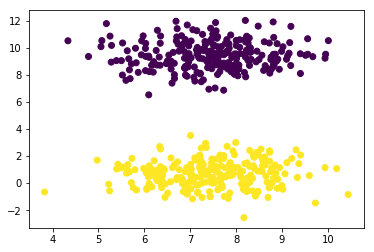

In [240]:
X,Y=make_blobs(n_samples=500,n_features=2,centers=2,random_state=8)
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

## Creating Single Perceptron

In [279]:
def sigmoid(x,weights,bias):
    return 1.0/(1+np.exp(-np.dot(x,weights.T)-bias))

def loss(X,Y,weights,bias):
    return np.sum( (Y-sigmoid(X,weights,bias))**2 )

def update(X,Y,weights,bias,learning_rate):
    Y_= sigmoid(X,weights,bias)
    weights-= learning_rate*np.dot(X.T,Y_- Y)
    bias-= learning_rate*np.sum(Y_-Y)
    return weights, bias

def train(X,Y,learning_rate,max_epoch=100,batch_size=10):
    weights=np.zeros(X.shape[1])
    bias=0.0
    losses=[]
    data=np.hstack((X,Y.reshape(-1,1)))
    random.shuffle(data)
    X=data[:,:-1]
    Y=data[:,-1]
    losses.append(loss(X,Y,weights,bias))
    ## using Stochastic Gradient Descent
    for i in range(max_epoch):
        for j in range(0,X.shape[0],batch_size):
            if X.shape[0]-j>=batch_size:
                weights,bias = update(np.array(X[j:j+batch_size]),np.array(Y[j:j+batch_size]),weights,bias,learning_rate)
                losses.append(loss(X,Y,weights,bias))
    return weights,bias,losses

def score(X,Y,weights,bias):
    Y_ = sigmoid(X,weights,bias)
    Y_[Y_>=0.5]=1
    Y_[Y_<0.5]=0
    return np.sum(Y_== Y)/Y.shape[0]

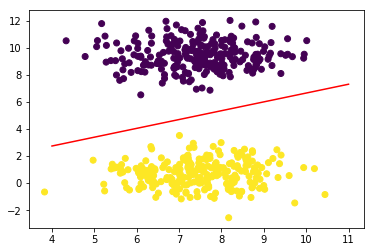

Accuracy: 1.0


In [280]:
weights,bias,losses = train(X,Y,0.01)
x1=np.linspace(4,11,15)
x2=-(weights[0]*x1+bias)/weights[1]
plt.scatter(X[:,0],X[:,1],c=Y)
plt.plot(x1,x2,c='red')
plt.show()
print("Accuracy: {}".format(score(X,Y,weights,bias)))

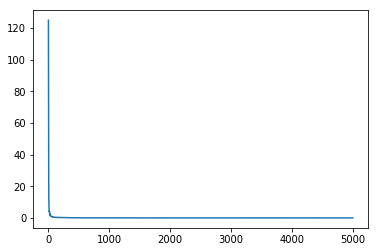

final loss: 0.005193603093774581


In [281]:
plt.show(plt.plot(losses))
print("final loss: {}".format(losses[np.argmin(losses)]))

## Non-linearly separable data

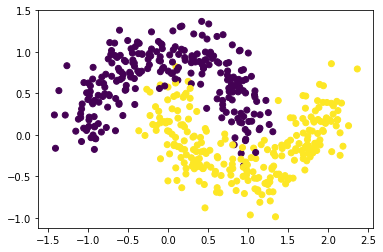

In [282]:
X1,Y1=make_moons(n_samples=500,noise=0.2,random_state=8)
plt.scatter(X1[:,0],X1[:,1],c=Y1)
plt.show()

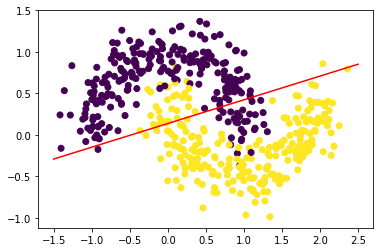

Accuracy: 0.87


In [283]:
weights,bias,losses=train(X1,Y1,0.001,500)
x1=np.linspace(-1.5,2.5,15)
x2=-(weights[0]*x1+bias)/weights[1]
plt.scatter(X1[:,0],X1[:,1],c=Y1)
plt.plot(x1,x2,c='red')
plt.show()
print("Accuracy: {}".format(score(X1,Y1,weights,bias)))

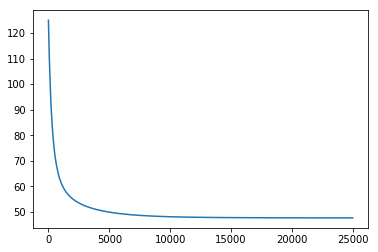

final loss: 47.59378027536471


In [284]:
plt.show(plt.plot(losses))
print("final loss: {}".format(losses[np.argmin(losses)]))